<a href="https://colab.research.google.com/github/Analia-Rivera/-Ciencia_de_datos-Pre_entregas/blob/main/Pre_entrega_3_ciberseguridad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRE ENTREGA 3:

CIBERSEGURIDAD.

En la pre entrega 2 empezamos a hablar de ciberseguridad y de la importancia de la misma a la hora de detectar los ataques lo mas rapido posible, para no tener pérdidas.

En esta ocasión seguimos con el mismo tema pero con otro dataset, en este caso utilizaremos [este dataset.](https://www.kaggle.com/datasets/shakirul09/cyber-crimes-dataset)
Este dataset no contiene datos reales, fue generado con inteligencia artifical con el objetivo de que sea usado para experimentar y ser usado como herramienta de aprendizaje en análisis y ciencia de datos. Contiene 100000 registros, y tiene comlumnas sobre región donde ocurrió el ataque, a qué industria fue, qué  tan severo fue y cuanto tardaron en mitigarlo y cómo.

Nuestro objetivo es ver cuales fueron los países que más ataques tuvieron y de que tipo, cual fue el horario mas buscado para el ataque y la industria mas afectada.
Y por último si el ataque fue exitoso o no.

In [ ]:
#importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
cb= pd.read_csv('//content/cybersecurity_large_synthesized_data.csv')
 #leemos el dataset

In [ ]:
cb.head()
 #revisamos lo que contiene

,attack_type,target_system,outcome,timestamp,attacker_ip,target_ip,data_compromised_GB,attack_duration_min,security_tools_used,user_role,location,attack_severity,industry,response_time_min,mitigation_method
0,Phishing,Cloud Service,Failure,2024-04-03 11:13:15.083419,21.166.79.4,23.20.50.78,15.31,300,Firewall,Employee,Australia,2,Energy,164,Containment
1,DDoS,Email Server,Success,2024-02-03 20:51:56.083463,187.180.150.169,34.160.58.218,65.05,242,Endpoint Detection,Admin,Brazil,10,Retail,64,Reset Credentials
2,Zero-Day Exploit,Cloud Service,Success,2024-07-19 18:40:05.083472,57.161.159.140,213.142.125.206,48.99,120,Firewall,External User,Germany,7,Finance,87,Quarantine
3,SQL Injection,Email Server,Failure,2023-12-08 00:54:17.083478,207.108.16.104,4.104.193.49,16.29,286,MFA,Employee,Russia,3,Healthcare,23,Patch
4,Zero-Day Exploit,IoT Device,Failure,2024-07-23 05:38:20.083483,98.122.15.31,57.66.53.194,87.66,4,Firewall,Contractor,UK,6,Finance,129,Containment


In [ ]:
cb.shape
  #mostramos cuantas features y filas contiene

(100000, 15)

In [ ]:
cb.columns
  #mostramos los nombres

Index(['attack_type', 'target_system', 'outcome', 'timestamp', 'attacker_ip',
       'target_ip', 'data_compromised_GB', 'attack_duration_min',
       'security_tools_used', 'user_role', 'location', 'attack_severity',
       'industry', 'response_time_min', 'mitigation_method'],
      dtype='object')

In [ ]:
cb.dtypes
  #vemos el tipo de datos

,0
attack_type,object
target_system,object
outcome,object
timestamp,object
attacker_ip,object
target_ip,object
data_compromised_GB,float64
attack_duration_min,int64
security_tools_used,object
user_role,object


In [ ]:
cb.isnull().sum()
  #vemos los faltantes


,0
attack_type,0
target_system,0
outcome,0
timestamp,0
attacker_ip,0
target_ip,0
data_compromised_GB,0
attack_duration_min,0
security_tools_used,0
user_role,0


si bien no hay ningun valor faltante, las revisamos por si hay algo raro o faltante que no se ve


In [ ]:
for column in cb.columns:
    print(column)
    print(cb[column].unique())

attack_type
['Phishing' 'DDoS' 'Zero-Day Exploit' 'SQL Injection' 'Malware'
 'Ransomware' 'Brute Force' 'Cross-Site Scripting']
target_system
['Cloud Service' 'Email Server' 'IoT Device' 'User Account'
 'Network Switch' 'Web Server' 'Database' 'API']
outcome
['Failure' 'Success']
timestamp
['2024-04-03 11:13:15.083419' '2024-02-03 20:51:56.083463'
 '2024-07-19 18:40:05.083472' ... '2024-07-29 07:53:22.650690'
 '2024-05-30 11:29:11.650692' '2023-12-27 04:46:54.650695']
attacker_ip
['21.166.79.4' '187.180.150.169' '57.161.159.140' ... '4.114.70.4'
 '91.200.147.68' '48.80.20.195']
target_ip
['23.20.50.78' '34.160.58.218' '213.142.125.206' ... '91.165.90.254'
 '221.209.161.150' '235.28.180.232']
data_compromised_GB
[15.31 65.05 48.99 ... 87.28 98.71  2.81]
attack_duration_min
[300 242 120 286   4 290 171  85 229 102 218 103 296 190  72  73 107 223
 235 162 194 152   6 163 130  97  38  93  13 243 244  57 251 165  80   2
 183 221 269 185  89 277  94 299 186  39  66 150  44 298 157 153  48 14

Revisamos y estan todos los datos


Vamos a eliminar algunas features que no nos aportan valor a nuestro objetivo, tambien eliminamos las siguientes features: user_role y target_system.

In [ ]:
# Elimino aquellas variables que no quiero incluir en el modelo y las guardo en df
df = cb.drop(['response_time_min', 'attack_duration_min',"attacker_ip","target_ip","user_role","target_system"],
                 axis=1)


In [ ]:
df.head()

,attack_type,outcome,timestamp,data_compromised_GB,security_tools_used,location,attack_severity,industry,mitigation_method
0,Phishing,Failure,2024-04-03 11:13:15.083419,15.31,Firewall,Australia,2,Energy,Containment
1,DDoS,Success,2024-02-03 20:51:56.083463,65.05,Endpoint Detection,Brazil,10,Retail,Reset Credentials
2,Zero-Day Exploit,Success,2024-07-19 18:40:05.083472,48.99,Firewall,Germany,7,Finance,Quarantine
3,SQL Injection,Failure,2023-12-08 00:54:17.083478,16.29,MFA,Russia,3,Healthcare,Patch
4,Zero-Day Exploit,Failure,2024-07-23 05:38:20.083483,87.66,Firewall,UK,6,Finance,Containment


In [ ]:
df['timestamp'] = pd.to_datetime(cb['timestamp']) #convierto a tipo datetime
#separo fecha y hora
df['fecha'] = df['timestamp'].dt.year
df['hora'] = df['timestamp'].dt.hour
print(df)


            attack_type  outcome                  timestamp  \
0              Phishing  Failure 2024-04-03 11:13:15.083419   
1                  DDoS  Success 2024-02-03 20:51:56.083463   
2      Zero-Day Exploit  Success 2024-07-19 18:40:05.083472   
3         SQL Injection  Failure 2023-12-08 00:54:17.083478   
4      Zero-Day Exploit  Failure 2024-07-23 05:38:20.083483   
...                 ...      ...                        ...   
99995          Phishing  Success 2024-08-09 10:48:51.650684   
99996        Ransomware  Failure 2023-12-19 07:13:23.650687   
99997  Zero-Day Exploit  Success 2024-07-29 07:53:22.650690   
99998              DDoS  Failure 2024-05-30 11:29:11.650692   
99999           Malware  Success 2023-12-27 04:46:54.650695   

       data_compromised_GB security_tools_used   location  attack_severity  \
0                    15.31            Firewall  Australia                2   
1                    65.05  Endpoint Detection     Brazil               10   
2        

In [ ]:
df=df.drop(['timestamp'],axis=1)

In [ ]:
#crear tabla pivot y chequear los nombres de las features, ideal si hay varios paises y tipos
pivot = cb.pivot_table(index='location', columns='attack_type', aggfunc='size', fill_value=0)

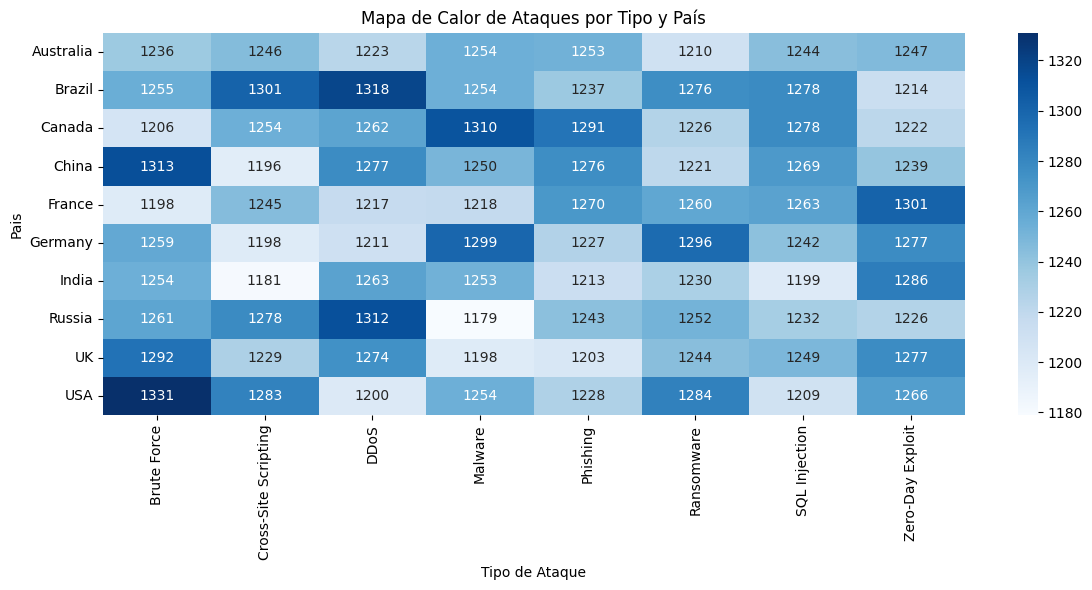

In [ ]:
#Creamos mapa de calor para ver las cantidades por tipo y pais
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, cmap='Blues', fmt='d')
plt.title('Mapa de Calor de Ataques por Tipo y País')
plt.ylabel('Pais')
plt.xlabel('Tipo de Ataque')
plt.tight_layout()
plt.show()

Debido a que las cantidades son parecidas, con el mapa de calor vemos más claramente donde hubo más ataques y de que tipo,
 USA es el país que más ataques tubo, del tipo brute force attack.

Un ataque de fuerza bruta (Brute Force Attack) es un tipo de ataque cibernético en el que un atacante intenta adivinar contraseñas o claves probando sistemáticamente todas las combinaciones posibles hasta encontrar la correcta.



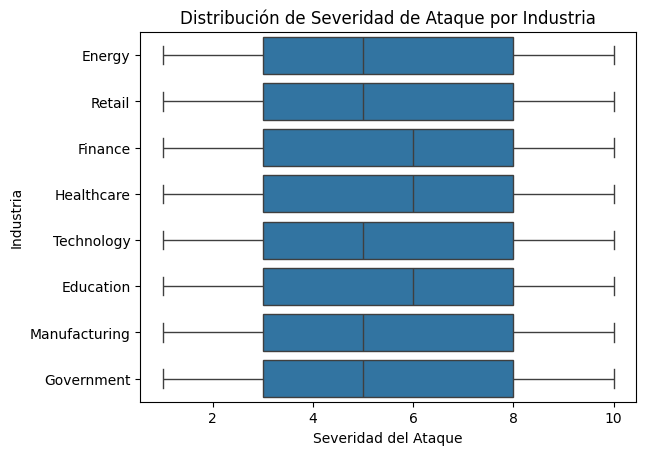

In [ ]:
sns.boxplot(x='attack_severity', y='industry', data=cb)
plt.title('Distribución de Severidad de Ataque por Industria')
plt.xlabel('Severidad del Ataque')
plt.ylabel('Industria')
plt.show()



Con estas 2 visualizaciones podemos ver las industrias mas afectadas, que son Healthcare, Finance y Education

In [ ]:
horas=df["hora"]
horas = pd.to_datetime(horas, format='%H').dt.hour

hsfrec = horas.value_counts()
hsfrec

,count
hora,
13,4261
17,4244
8,4236
9,4234
10,4226
2,4223
1,4215
19,4205
3,4187


In [ ]:
hora_mas_frecuente = hsfrec.idxmax()
hora_mas_frecuente
print("La hora más frecuente es:", hora_mas_frecuente,':00')


La hora más frecuente es: 13 :00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Agrupar por país y outcome
outcomes = df.groupby(['location', 'outcome']).size().unstack(fill_value=0)

# Mostrar tabla
print(outcomes)


outcome    Failure  Success
location                   
Australia     4913     5000
Brazil        5185     4948
Canada        4962     5087
China         4976     5065
France        5021     4951
Germany       5004     5005
India         4953     4926
Russia        5029     4954
UK            4903     5063
USA           5024     5031


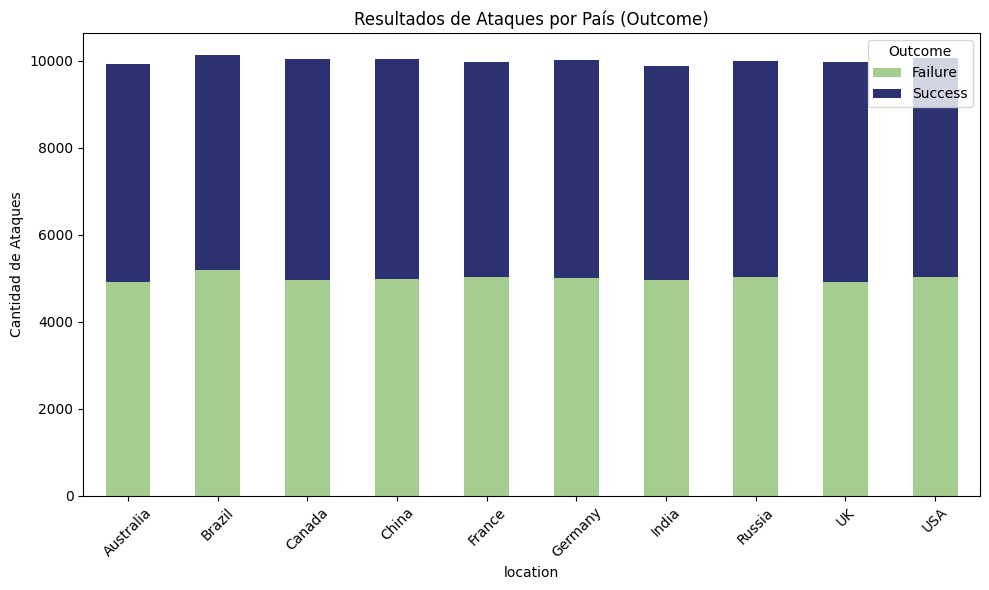

In [ ]:
# Gráfico de barras apiladas por país
outcomes.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='crest')

plt.title("Resultados de Ataques por País (Outcome)")
plt.xlabel("location")
plt.ylabel("Cantidad de Ataques")
plt.legend(title="Outcome")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Transformacion de datos

In [ ]:
df.columns

Index(['attack_type', 'outcome', 'data_compromised_GB', 'security_tools_used',
       'location', 'attack_severity', 'industry', 'mitigation_method', 'fecha',
       'hora'],
      dtype='object')

In [ ]:
df.head()

,attack_type,outcome,data_compromised_GB,security_tools_used,location,attack_severity,industry,mitigation_method,fecha,hora
0,Phishing,Failure,15.31,Firewall,Australia,2,Energy,Containment,2024,11
1,DDoS,Success,65.05,Endpoint Detection,Brazil,10,Retail,Reset Credentials,2024,20
2,Zero-Day Exploit,Success,48.99,Firewall,Germany,7,Finance,Quarantine,2024,18
3,SQL Injection,Failure,16.29,MFA,Russia,3,Healthcare,Patch,2023,0
4,Zero-Day Exploit,Failure,87.66,Firewall,UK,6,Finance,Containment,2024,5


In [ ]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [ ]:
severitylabelencoder=LabelEncoder()
df['severity']=severitylabelencoder.fit_transform(cb['attack_severity'])

In [ ]:
severitylabelencoder=LabelEncoder()
df['GB_data']=severitylabelencoder.fit_transform(cb['data_compromised_GB'])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report


Nuestro objetivo será ver si tuvo éxito o no cada ataque TERMINAR

In [ ]:
x=df[['attack_type','security_tools_used', 'location','attack_severity', 'industry', 'mitigation_method', 'fecha', 'hora']] #variables independientes
y=df["outcome"]       #variable objetivo
#Separamos las variables


Transformamos las variables categóricas

Al tranformar las variables con onehotencoder se soluciono el error de RAM, que antes lo habiamos hecho con get dummies

In [ ]:
from sklearn.preprocessing import OneHotEncoder
columnas_categoricas = ['attack_type', 'security_tools_used', 'location', 'industry','mitigation_method']
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
#Transformamos la información categorica
x_encoded_cat = onehot_encoder.fit_transform(x[columnas_categoricas])
#Pasamos de vuelta a Dataframe y combinamos los features numericos con los categoricos
x_encoded_cat_df = pd.DataFrame(x_encoded_cat, columns=onehot_encoder.get_feature_names_out(columnas_categoricas))
x_encoded = pd.concat([x_encoded_cat_df, x[['attack_severity', 'fecha', 'hora']].reset_index(drop=True)], axis=1)

# Fill any potential NaNs introduced by one-hot encoding or concatenation
x_encoded.fillna(0, inplace=True)

print(x_encoded.head())

   attack_type_Brute Force  attack_type_Cross-Site Scripting  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   

   attack_type_DDoS  attack_type_Malware  attack_type_Phishing  \
0               0.0                  0.0                   1.0   
1               1.0                  0.0                   0.0   
2               0.0                  0.0                   0.0   
3               0.0                  0.0                   0.0   
4               0.0                  0.0                   0.0   

   attack_type_Ransomware  attack_type_SQL Injection  \
0                     0.0                        0.0   
1                     0.0                        0.0   
2                     0.0                        0

En este caso usaremos SVM porque tenemos un dataset de pocas dimensiones y con márgen claro entre clases, para lo cual consideramos la mejor opción.




Usamos StandardScaler porque SVM es sensible a la escala.

kernel='rbf' permite capturar relaciones no lineales (muy útil en ciberseguridad).

Podés ajustar los hiperparámetros C y gamma para mejorar el rendimiento (GridSearchCV).



In [ ]:
model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1, gamma='scale'))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=1))])

Usamos SVM


In [ ]:
x_train.shape

(80000, 42)

In [ ]:
x_test.shape

(20000, 42)

Predecimos el modelo

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)



['Failure' 'Success' 'Success' ... 'Success' 'Success' 'Success']


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[4907 5066]
 [5004 5023]]


Métricas

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

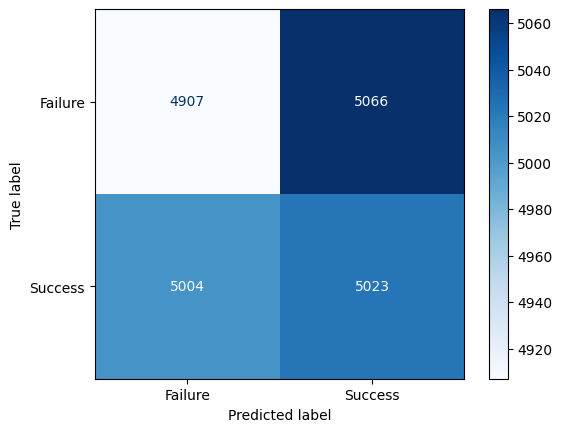

In [ ]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap="Blues")

In [ ]:
print(y_train.value_counts(normalize=True))


outcome
Success    0.500038
Failure    0.499962
Name: proportion, dtype: float64


Hicimos un análisis mediante el cual llegamos a la conlusión de que el dataset con el que trabajamos ya esta previamente limpio.
Por eso consideramos que la prediccion hecha fue un tanto errónea. Por lo tanto todas las métricas son parecidas,el modelo esta sobreentrenado y no da valores correctos.
Recomendamos buscar mas información de los ataques durante esos años asi evaluamos nuevamente el modelo.

Para mejorar el desempeño  vamos a usar metricas
Accuracy : porcentaje de predicciones correctas.

Precision: cuántos de los positivos predichos fueron verdaderos.

Recall: cuántos de los positivos reales fueron encontrados.

F1-Score: balance entre precisión y recall.

Matriz de confusión: muestra los aciertos y errores en cada clase.

              precision    recall  f1-score   support

     Failure       0.50      0.49      0.49      9973
     Success       0.50      0.50      0.50     10027

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



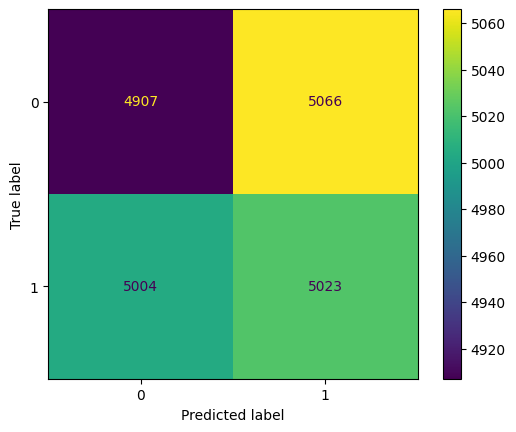

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


Vemos que hay overfittin para evitar vamos a utilizar la validacion cruzada, evaluando el modelo en varias divisiones no en una sola

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_encoded, y, cv=3, scoring='f1_macro')
print("F1 promedio con validación cruzada:", scores.mean())

F1 promedio con validación cruzada: 0.4994754136854853


si hay un desbalance fuerte probamos Oversampling (smote)

 la variable objetivo outcome (éxito del ataque) está desbalanceada: hay muchos más ataques no exitosos que exitosos.

Esto hace que los modelos aprendan a predecir siempre la clase mayoritaria y tengan buen accuracy, pero en realidad no detectan bien la clase minoritaria (que es la más importante en este caso).

Smote Balancea el dataset generando nuevos ejemplos sintéticos de la clase minoritaria.Interpola entre vecinos cercanos para crear nuevos puntos similares
Dado que la variable outcome estaba desbalanceada, se aplicó SMOTE para generar ejemplos sintéticos de la clase minoritaria, y SMOTETomek para eliminar observaciones confusas.
Esto permitió mejorar la capacidad del modelo para detectar correctamente los ataques exitosos, que son los más críticos desde el punto de vista de la ciberseguridad.

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(x_encoded, y)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X_resampled, y_resampled_encoded, test_size=0.2, random_state=42, stratify=y_resampled_encoded
)

Usar random forest

como esta en la clase :

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(rf, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 50}


RandomForest es mucho más rápido y tolera variables no escaladas, incluso con muchas columnas (como las que genera OneHotEncoder).



/tmp/ipython-input-49-3136449065.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(20), x='Importance', y='Feature', palette='viridis')


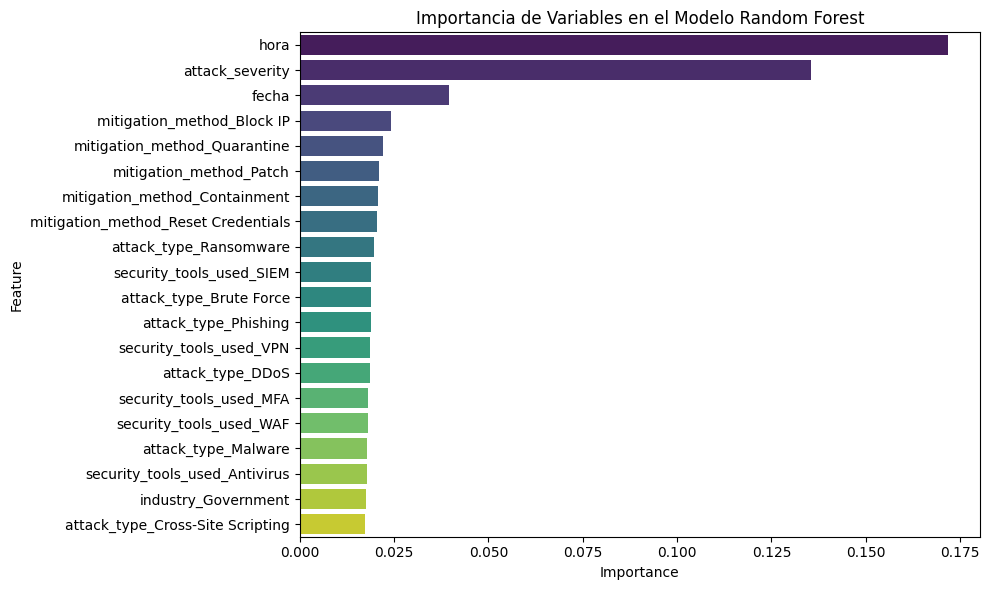

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importancia de las variables del mejor modelo
importancias = grid.best_estimator_.feature_importances_
features = X_train.columns

# Crear DataFrame y ordenar
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importancias})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Importancia de Variables en el Modelo Random Forest')
plt.tight_layout()
plt.show()


metricas del random forest final

              precision    recall  f1-score   support

     Failure       0.50      0.49      0.49     10006
     Success       0.50      0.51      0.50     10006

    accuracy                           0.50     20012
   macro avg       0.50      0.50      0.50     20012
weighted avg       0.50      0.50      0.50     20012



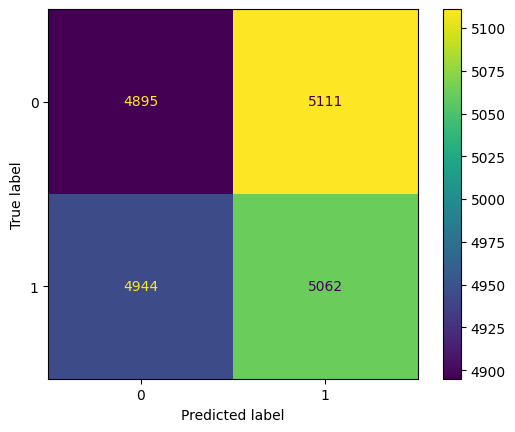

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_rf = grid.predict(X_test)

print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot()


In [ ]:
from sklearn.model_selection import cross_val_score

rf_best = grid.best_estimator_
scores_rf = cross_val_score(rf_best, X_resampled, y_resampled, cv=3, scoring='f1_macro')
print("F1 promedio RF con validación cruzada:", scores_rf.mean())


F1 promedio RF con validación cruzada: 0.4998057394222841


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}

grid = GridSearchCV(xgb, param_grid, cv=3, scoring='f1_macro')
grid.fit(X_resampled, y_resampled_encoded)

best_model = grid.best_estimator_

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:00:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:00:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:00:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:00:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:00:07] WARNING: /w

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)  # quedate con las 10 mejores
X_new = selector.fit_transform(X_resampled, y_resampled)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

scores = cross_val_score(best_model, X_train, y_train_encoded, cv=3, scoring='f1_macro')
print("F1 promedio validación cruzada:", scores.mean())

y_pred = best_model.predict(X_test)
print(classification_report(y_test_encoded, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:06:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:06:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:06:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1 promedio validación cruzada: 0.5004646523956173
              precision    recall  f1-score   support

           0       0.57      0.55      0.56     10006
           1       0.57      0.59      0.58     10006

    accuracy                           0.57     20012
   macro avg       0.57      0.57      0.57     20012
weighted avg       0.57      0.57      0.57     20012



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Aplico SMOTE sólo en los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train_encoded)

# Validación cruzada sobre el dataset balanceado
scores = cross_val_score(best_model, X_train_res, y_train_res, cv=3, scoring='f1_macro')
print("F1 promedio validación cruzada:", scores.mean())

# Evaluación final sobre el test original
y_pred = best_model.predict(X_test)
print(classification_report(y_test_encoded, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:08:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:08:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:08:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1 promedio validación cruzada: 0.5004646523956173
              precision    recall  f1-score   support

           0       0.57      0.55      0.56     10006
           1       0.57      0.59      0.58     10006

    accuracy                           0.57     20012
   macro avg       0.57      0.57      0.57     20012
weighted avg       0.57      0.57      0.57     20012



In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=15)  # ajustá "k" según tu caso
X_new = selector.fit_transform(x_encoded, y)

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train_encoded)


In [ ]:
!pip install imbalanced-learn



In [ ]:
pip install imbalanced-learn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder

# Use the encoded features and target variable
X = x_encoded
y = df["outcome"] # Define y explicitly

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split inicial
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Selección de variables
selector = SelectKBest(score_func=f_classif, k=15)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

# Balanceo con SMOTETomek
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train_sel, y_train)

# GridSearch
xgb = XGBClassifier(random_state=42, n_jobs=-1)
params = {
    'n_estimators': [100,200],
    'max_depth': [3, 5,7],
    'learning_rate': [00.1,0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0,1],
    'min_child_weight': [1, 5]
}
grid = GridSearchCV(xgb, params, scoring='f1_macro', cv=3, n_jobs=-1)
grid.fit(X_res, y_res)

# Validación cruzada
best_model = grid.best_estimator_
scores = cross_val_score(best_model, X_res, y_res, cv=3, scoring='f1_macro')
print("F1 promedio con validación cruzada:", scores.mean())

# Predicción y métricas en test
y_pred = best_model.predict(X_test_sel)
print(classification_report(y_test, y_pred))

F1 promedio con validación cruzada: 0.5028766023049219
              precision    recall  f1-score   support

           0       0.50      0.48      0.49      9994
           1       0.50      0.51      0.50     10006

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



A partir del análisis exploratorio, detectamos que EE.UU. es el país con más ataques, especialmente del tipo fuerza bruta, afectando industrias como salud, finanzas y educación. Esto motivó el desarrollo de modelos de clasificación para predecir si un ataque será exitoso o no. Luego de comparar SVM, Random Forest y XGBoost, este último obtuvo el mejor F1-score tras optimización y balanceo, demostrando ser el más robusto frente al desbalanceo de clases y la alta dimensionalidad del dataset.

Además, realizamos un análisis de series temporales con Prophet para visualizar la tendencia de ataques a lo largo del tiempo. Esto nos permite identificar picos o posibles patrones estacionales

In [ ]:
!pip install prophet


In [ ]:
import pandas as pd
#convierto fechas
df = pd.read_csv('/content/cybersecurity_large_synthesized_data.csv')

# Asegurarte que la columna sea datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [ ]:
#agrupo ataques x dia

# Agrupar cantidad de ataques por día
df_daily = df.groupby(df['timestamp'].dt.date).size().reset_index(name='attack_count')

# Renombrar para Prophet
df_daily.columns = ['ds', 'y']
df_daily['ds'] = pd.to_datetime(df_daily['ds'])  # volver a datetime


In [ ]:
#entreno prophet
from prophet import Prophet

model = Prophet()
model.fit(df_daily)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxjuzgzjr/v1wnk9u3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxjuzgzjr/i1etb13i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18553', 'data', 'file=/tmp/tmpxjuzgzjr/v1wnk9u3.json', 'init=/tmp/tmpxjuzgzjr/i1etb13i.json', 'output', 'file=/tmp/tmpxjuzgzjr/prophet_model5g1y8f9c/prophet_model-20250726120621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:06:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:06:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#predecir proximos 30 dias
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)


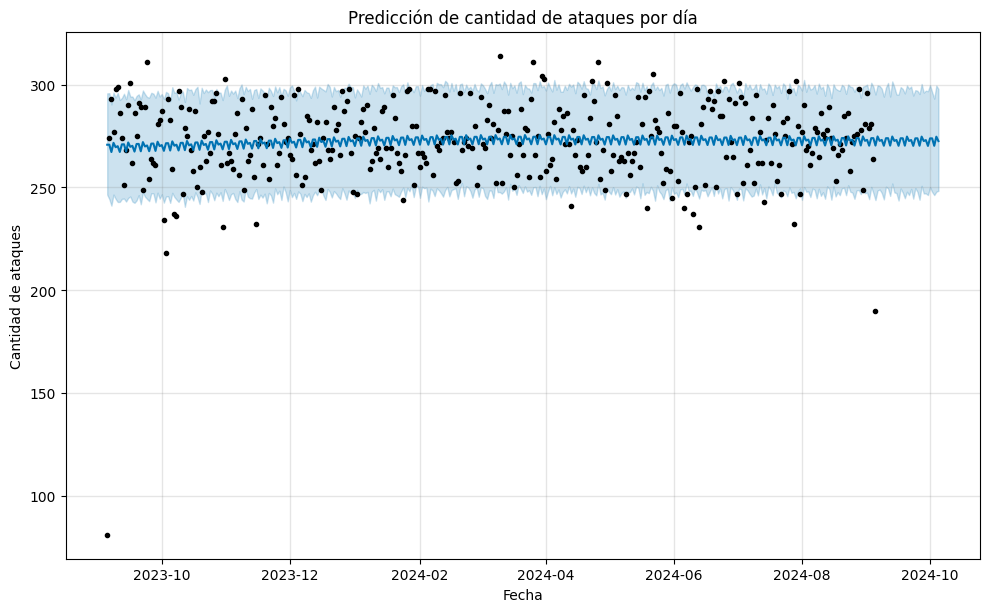

In [ ]:
import matplotlib.pyplot as plt #grafico prediccion

fig1 = model.plot(forecast)
plt.title('Predicción de cantidad de ataques por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de ataques')
plt.show()


Hay mucha variabilidad diaria (puntos dispersos), pero no se observa un aumento o disminución clara en la tendencia.

El modelo predice una continuidad estable para los próximos 30 días.

Picos o caídas abruptas pueden indicar eventos anómalos o días atípicos (como el punto debajo de 100 o encima de 300).

El modelo Prophet detectó una leve variación cíclica en los datos diarios, lo cual se refleja en la línea azul con pequeñas curvas. Estas ondulaciones no son errores, sino estimaciones basadas en patrones temporales sutiles, como fluctuaciones por día de la semana o tendencia estacional leve.”



Como análisis complementario, utilizamos el modelo Prophet para visualizar la evolución de los ataques cibernéticos a lo largo del tiempo.

En el gráfico se observa la cantidad diaria de ataques, representada por puntos negros, y una línea azul que muestra la tendencia estimada por el modelo.

El área azul claro representa el intervalo de confianza del modelo, es decir, el rango dentro del cual se espera que se mantenga el número de ataques en los próximos días.

Se puede observar que, si bien existe cierta variación diaria, la tendencia general se mantiene relativamente estable, en un promedio de aproximadamente 270 ataques por día.

Este tipo de análisis temporal permite anticipar posibles cambios en el volumen de ataques y complementar los modelos de predicción de éxito (outcome) con una perspectiva temporal del riesgo.

Se utilizó XGBoost, un algoritmo de ensamble basado en árboles que combina múltiples modelos simples y los optimiza de forma secuencial. Su ventaja principal es la precisión, eficiencia y capacidad de generalización, incluso en datasets complejos como este de ciberseguridad.

Muy eficiente en datasets grandes.

Tiene regularización → evita overfitting.

Soporta missing values, categorías, y permite mucha personalización.

Funciona muy bien en competencias de ciencia de datos y tareas reales.